In [1]:
import tensorflow.keras as keras 

data = keras.datasets.cifar10.load_data()

In [2]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(img, label):
    plt.axis("off")
    plt.title(classes[int(label)])
    plt.imshow(img)

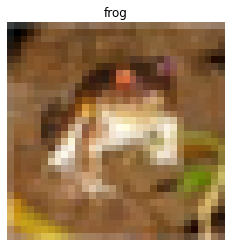

In [7]:
plot_image(X_train[0], y_train[0])

<Figure size 432x288 with 0 Axes>

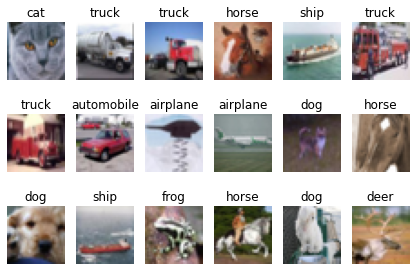

In [8]:
# 3x6
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.figure(figsize=(6*1.2, 3*1.6))

idxs = np.random.randint(0, len(X_train), 6*3)
for i in range(3*6):
    plt.subplot(3, 6, i+1)
    plot_image(X_train[idxs[i]], y_train[idxs[i]])
plt.show()

In [9]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[32, 32, 3]))

for i in range(20):
    model.add(layers.Dense(
        100, activation="elu", kernel_initializer="he_normal"
    ))

model.add(layers.Dense(10, activation="softmax"))

In [10]:
model.compile(
    optimizer=keras.optimizers.Nadam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
import os
import time

BATCH_SIZE = 64
EPOCHS = 100

def get_run(name):
    return os.path.join(os.curdir, "cifar_logs", "run_" + name + "_" + time.strftime("%d%m%y-%H%M%S"))

callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.TensorBoard(get_run("cifar")),
    keras.callbacks.ModelCheckpoint("cifar.h5", save_best_only=True)
]

In [12]:
model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.02,
)

2022-04-02 09:51:53.170705: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
766/766 [==============================] - 7s 7ms/step - loss: 5.5583 - accuracy: 0.2042 - val_loss: 2.0960 - val_accuracy: 0.2680
Epoch 2/100
766/766 [==============================] - 6s 7ms/step - loss: 1.9553 - accuracy: 0.2761 - val_loss: 1.9177 - val_accuracy: 0.2860
Epoch 3/100
766/766 [==============================] - 5s 7ms/step - loss: 1.8789 - accuracy: 0.3077 - val_loss: 1.8738 - val_accuracy: 0.3150
Epoch 4/100
766/766 [==============================] - 6s 8ms/step - loss: 1.8280 - accuracy: 0.3320 - val_loss: 1.8503 - val_accuracy: 0.3300
Epoch 5/100
766/766 [==============================] - 5s 7ms/step - loss: 1.7973 - accuracy: 0.3482 - val_loss: 1.8142 - val_accuracy: 0.3500
Epoch 6/100
766/766 [==============================] - 6s 8ms/step - loss: 1.7595 - accuracy: 0.3611 - val_loss: 1.7795 - val_accuracy: 0.3760
Epoch 7/100
766/766 [==============================] - 6s 8ms/step - loss: 1.7286 - accuracy: 0.3748 - val_loss: 1.7397 - val_accuracy: 0.3940

In [13]:
model2 = keras.models.Sequential()
model2.add(layers.Flatten(input_shape=[32, 32, 3]))
model2.add(layers.BatchNormalization()),

for i in range(20):
    model2.add(layers.Dense(
        100, activation="elu", kernel_initializer="he_normal"
    ))
    model2.add(layers.BatchNormalization()),

model2.add(layers.Dense(10, activation="softmax"))

In [14]:
model2.compile(
    optimizer=keras.optimizers.Nadam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.TensorBoard(get_run("cifar_batch")),
    keras.callbacks.ModelCheckpoint("cifar_batch.h5", save_best_only=True)
]

model2.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.02,
)

Epoch 1/100
766/766 [==============================] - 11s 10ms/step - loss: 1.8393 - accuracy: 0.3425 - val_loss: 1.6440 - val_accuracy: 0.4210
Epoch 2/100
766/766 [==============================] - 9s 12ms/step - loss: 1.6250 - accuracy: 0.4200 - val_loss: 1.5099 - val_accuracy: 0.4640
Epoch 3/100
766/766 [==============================] - 9s 11ms/step - loss: 1.5324 - accuracy: 0.4527 - val_loss: 1.4863 - val_accuracy: 0.4670
Epoch 4/100
766/766 [==============================] - 8s 10ms/step - loss: 1.4698 - accuracy: 0.4792 - val_loss: 1.4346 - val_accuracy: 0.5190
Epoch 5/100
766/766 [==============================] - 8s 10ms/step - loss: 1.4220 - accuracy: 0.4954 - val_loss: 1.3658 - val_accuracy: 0.5140
Epoch 6/100
766/766 [==============================] - 8s 10ms/step - loss: 1.3746 - accuracy: 0.5165 - val_loss: 1.3867 - val_accuracy: 0.5170
Epoch 7/100
766/766 [==============================] - 8s 10ms/step - loss: 1.3470 - accuracy: 0.5243 - val_loss: 1.3677 - val_accuracy

In [15]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [16]:
model3 = keras.models.Sequential()
model3.add(layers.Flatten(input_shape=[32, 32, 3]))

for i in range(20):
    model3.add(layers.Dense(
        100, activation="selu", kernel_initializer="lecun_normal"
    ))

model3.add(layers.Dense(10, activation="softmax"))

In [17]:
model3.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=7e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.TensorBoard(get_run("cifar_selu")),
    keras.callbacks.ModelCheckpoint("cifar_selu.h5", save_best_only=True)
]

model3.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.02
)

Epoch 1/100
1532/1532 [==============================] - 10s 6ms/step - loss: 1.9167 - accuracy: 0.3152 - val_loss: 1.8317 - val_accuracy: 0.3570
Epoch 2/100
1532/1532 [==============================] - 9s 6ms/step - loss: 1.6996 - accuracy: 0.3937 - val_loss: 1.6091 - val_accuracy: 0.4370
Epoch 3/100
1532/1532 [==============================] - 8s 5ms/step - loss: 1.6066 - accuracy: 0.4330 - val_loss: 1.6379 - val_accuracy: 0.4210
Epoch 4/100
1532/1532 [==============================] - 8s 5ms/step - loss: 1.5366 - accuracy: 0.4582 - val_loss: 1.5196 - val_accuracy: 0.4770
Epoch 5/100
1532/1532 [==============================] - 8s 5ms/step - loss: 1.4818 - accuracy: 0.4802 - val_loss: 1.4594 - val_accuracy: 0.4930
Epoch 6/100
1532/1532 [==============================] - 8s 5ms/step - loss: 1.4315 - accuracy: 0.4997 - val_loss: 1.4222 - val_accuracy: 0.5010
Epoch 7/100
1532/1532 [==============================] - 8s 5ms/step - loss: 1.3872 - accuracy: 0.5172 - val_loss: 1.4059 - val_a

In [18]:
model4 = keras.models.Sequential()
model4.add(layers.Flatten(input_shape=[32, 32, 3]))
model4.add(layers.AlphaDropout(rate=0.2))

for i in range(20):
    model4.add(layers.Dense(
        100, activation="selu", kernel_initializer="lecun_normal"
    ))
    model4.add(layers.AlphaDropout(rate=0.2))

model4.add(layers.Dense(10, activation="softmax"))

In [19]:
model4.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=7e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    keras.callbacks.EarlyStopping(patience=20),
    keras.callbacks.TensorBoard(get_run("cifar_selu_alpha")),
    keras.callbacks.ModelCheckpoint("cifar_selu_alpha.h5", save_best_only=True)
]

model4.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.02
)

Epoch 1/100
1532/1532 [==============================] - 11s 6ms/step - loss: 2.3535 - accuracy: 0.1396 - val_loss: 111.6536 - val_accuracy: 0.1470
Epoch 2/100
1532/1532 [==============================] - 10s 7ms/step - loss: 2.1109 - accuracy: 0.1670 - val_loss: 127.5456 - val_accuracy: 0.1780
Epoch 3/100
1532/1532 [==============================] - 9s 6ms/step - loss: 2.0412 - accuracy: 0.1896 - val_loss: 103.9481 - val_accuracy: 0.1310
Epoch 4/100
1532/1532 [==============================] - 9s 6ms/step - loss: 2.0178 - accuracy: 0.2027 - val_loss: 126.3238 - val_accuracy: 0.1870
Epoch 5/100
1532/1532 [==============================] - 9s 6ms/step - loss: 2.0023 - accuracy: 0.2177 - val_loss: 156.8566 - val_accuracy: 0.1410
Epoch 6/100
1532/1532 [==============================] - 9s 6ms/step - loss: 1.9941 - accuracy: 0.2210 - val_loss: 111.7930 - val_accuracy: 0.1590
Epoch 7/100
1532/1532 [==============================] - 10s 6ms/step - loss: 1.9740 - accuracy: 0.2367 - val_loss: 

In [20]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [21]:
model5 = keras.models.Sequential([
    MCAlphaDropout(layer.rate)  if isinstance(layer, layers.AlphaDropout) else layer
    for layer in model4.layers
])

model5.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=7e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model5.set_weights(model4.get_weights())

In [22]:
def mc_dropout_predict_probas(mc_model, X, n_samples=20):
    y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=20):
    y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(y_probas, axis=1)

In [26]:
import math

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = keras.backend.get_value(model.optimizer.learning_rate)
    keras.backend.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    keras.backend.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        keras.backend.set_value(self.model.optimizer.learning_rate, rate)

In [56]:
model6 = keras.models.Sequential()
model6.add(layers.Flatten(input_shape=[32, 32, 3]))

for i in range(20):
    model6.add(layers.Dense(
        100, activation="selu", kernel_initializer="lecun_normal"
    ))

model6.add(keras.layers.AlphaDropout(rate=0.1))
model6.add(layers.Dense(10, activation="softmax"))
model6.compile(loss="sparse_categorical_crossentropy",
        optimizer = keras.optimizers.SGD(learning_rate=1e-2),
        metrics=["accuracy"])

391/391 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.1433


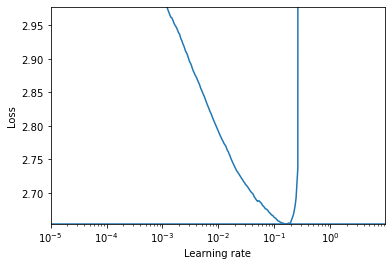

In [57]:
BATCH_SIZE = 128

rates, losses = find_learning_rate(model6, X_train_scaled, y_train, 1, BATCH_SIZE)
plot_lr_vs_loss(rates, losses)
plt.show()

In [71]:
model6 = keras.models.Sequential()
model6.add(layers.Flatten(input_shape=[32, 32, 3]))

for i in range(20):
    model6.add(layers.Dense(
        100, activation="selu", kernel_initializer="lecun_normal"
    ))

model6.add(keras.layers.AlphaDropout(rate=0.1))
model6.add(layers.Dense(10, activation="softmax"))
model6.compile(loss="sparse_categorical_crossentropy",
        optimizer = keras.optimizers.SGD(learning_rate=1e-2),
        metrics=["accuracy"])

In [72]:
EPOCHS = 15

callbacks = [
    keras.callbacks.TensorBoard(get_run("cifar_selu_one")),
    keras.callbacks.ModelCheckpoint("cifar_selu_one.h5", save_best_only=True),
    OneCycleScheduler(math.ceil(len(X_train_scaled) / BATCH_SIZE) * EPOCHS, max_rate=0.05)
]

model6.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    validation_split=0.02
)

Epoch 1/15
383/383 [==============================] - 4s 11ms/step - loss: 2.0443 - accuracy: 0.2844 - val_loss: 1.7670 - val_accuracy: 0.3860
Epoch 2/15
383/383 [==============================] - 4s 10ms/step - loss: 1.7729 - accuracy: 0.3708 - val_loss: 1.6252 - val_accuracy: 0.4400
Epoch 3/15
383/383 [==============================] - 3s 7ms/step - loss: 1.6313 - accuracy: 0.4233 - val_loss: 1.5885 - val_accuracy: 0.4270
Epoch 4/15
383/383 [==============================] - 3s 7ms/step - loss: 1.5467 - accuracy: 0.4502 - val_loss: 1.5599 - val_accuracy: 0.4580
Epoch 5/15
383/383 [==============================] - 3s 7ms/step - loss: 1.4905 - accuracy: 0.4731 - val_loss: 1.5188 - val_accuracy: 0.4730
Epoch 6/15
383/383 [==============================] - 3s 7ms/step - loss: 1.4511 - accuracy: 0.4846 - val_loss: 1.5047 - val_accuracy: 0.4580
Epoch 7/15
383/383 [==============================] - 3s 7ms/step - loss: 1.4132 - accuracy: 0.5000 - val_loss: 1.4498 - val_accuracy: 0.5050
Epoc

In [73]:
model7 = keras.models.Sequential()
model7.add(layers.Flatten(input_shape=[32, 32, 3]))
model7.add(layers.BatchNormalization())

for i in range(20):
    model7.add(layers.Dense(
        100, activation="elu", kernel_initializer="he_normal"
    ))
    model7.add(layers.BatchNormalization())

model7.add(keras.layers.AlphaDropout(rate=0.1))
model7.add(layers.Dense(10, activation="softmax"))
model7.compile(loss="sparse_categorical_crossentropy",
        optimizer = keras.optimizers.SGD(learning_rate=1e-2),
        metrics=["accuracy"])


callbacks = [
    keras.callbacks.TensorBoard(get_run("cifar_elu_one")),
    keras.callbacks.ModelCheckpoint("cifar_elu_one.h5", save_best_only=True),
    OneCycleScheduler(math.ceil(len(X_train_scaled) / BATCH_SIZE) * EPOCHS, max_rate=0.05)
]

model6.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    validation_split=0.02
)

Epoch 1/15
383/383 [==============================] - 4s 11ms/step - loss: 0.9208 - accuracy: 0.6728 - val_loss: 1.5308 - val_accuracy: 0.5090
Epoch 2/15
383/383 [==============================] - 4s 10ms/step - loss: 0.9578 - accuracy: 0.6587 - val_loss: 1.5037 - val_accuracy: 0.5100
Epoch 3/15
383/383 [==============================] - 3s 8ms/step - loss: 0.9976 - accuracy: 0.6451 - val_loss: 1.5538 - val_accuracy: 0.5120
Epoch 4/15
383/383 [==============================] - 3s 8ms/step - loss: 1.0309 - accuracy: 0.6359 - val_loss: 1.5452 - val_accuracy: 0.5080
Epoch 5/15
383/383 [==============================] - 3s 8ms/step - loss: 1.0679 - accuracy: 0.6212 - val_loss: 1.4685 - val_accuracy: 0.5220
Epoch 6/15
383/383 [==============================] - 3s 8ms/step - loss: 1.0871 - accuracy: 0.6133 - val_loss: 1.5431 - val_accuracy: 0.5040
Epoch 7/15
383/383 [==============================] - 3s 8ms/step - loss: 1.1115 - accuracy: 0.6061 - val_loss: 1.5330 - val_accuracy: 0.5000
Epoc